# **Proyek Machine Learning: Prediksi Biaya Asuransi Kesehatan**
*   **Nama:** Putu Yoga Suartana
*   **Email:** yoga.suartana46@gmail.com
*   **ID Dicoding:** putu_yoga_suartana_GJkz

# 1. **Import Library**
Tahap ini mengimpor semua library yang dibutuhkan untuk analisis data, visualisasi, pra-pemrosesan, dan pemodelan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **2. Data Loading**
Di Google Colab, cara termudah untuk memuat dataset adalah dengan mengunggahnya langsung. Jalankan sel kode di bawah ini, lalu klik tombol "Choose Files" dan pilih file `insurance.csv` yang sudah Anda unduh dari Kaggle.

In [2]:
from google.colab import files
import io

# Kode ini akan menampilkan tombol untuk mengunggah file
print("Silakan unggah file insurance.csv")
uploaded = files.upload()

# Membaca file yang diunggah ke dalam DataFrame pandas
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\nData '{file_name}' berhasil dimuat.")
df.head()

Silakan unggah file insurance.csv


Saving insurance.csv to insurance (3).csv

Data 'insurance (3).csv' berhasil dimuat.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **3. Data Understanding**
Tahap ini bertujuan untuk memahami isi dari dataset, termasuk struktur, tipe data, distribusi, dan hubungan antar variabel.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Insight: Dataset terdiri dari 1338 baris dan 7 kolom. Kabar baiknya, tidak ada nilai yang hilang (missing values) pada semua kolom, sehingga kita tidak perlu melakukan imputasi data. Terdapat 3 fitur kategorikal (`sex`, `smoker`, `region`) yang nantinya perlu diubah menjadi format numerik.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Eksploratory Data Analysis (EDA)**
Visualisasi untuk mendapatkan pemahaman mendalam tentang data.

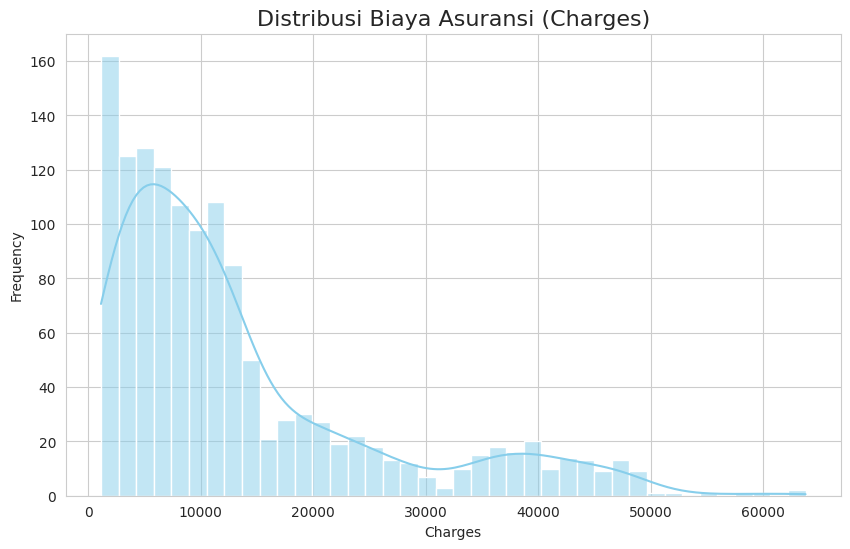

In [5]:
# Set style untuk plot
sns.set_style("whitegrid")

# Plot distribusi variabel target 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40, color='skyblue')
plt.title('Distribusi Biaya Asuransi (Charges)', fontsize=16)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Insight: Distribusi `charges` sangat miring ke kanan (right-skewed), yang mengindikasikan bahwa sebagian besar nasabah memiliki biaya rendah, namun ada beberapa kasus dengan biaya yang sangat tinggi. Fitur `smoker` diduga menjadi penyebab utama dari biaya tinggi ini.

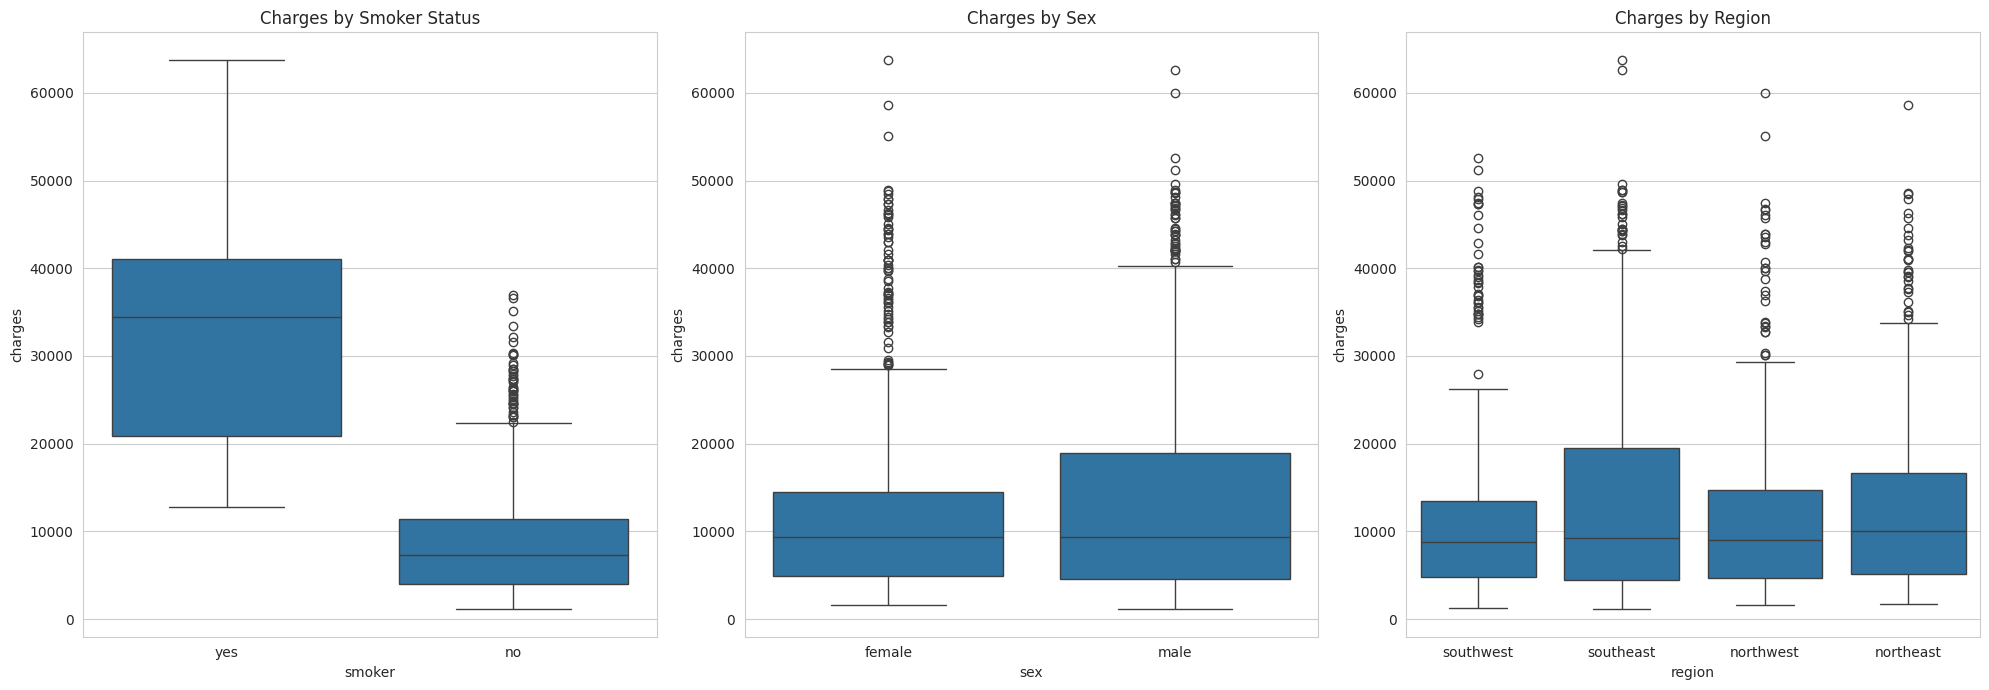

In [6]:
# Analisis fitur kategorikal terhadap 'charges'
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0])
axes[0].set_title('Charges by Smoker Status')
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1])
axes[1].set_title('Charges by Sex')
sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
axes[2].set_title('Charges by Region')
plt.tight_layout()
plt.show()

Insight: Visualisasi box plot mengonfirmasi hipotesis awal. Fitur `smoker` memiliki dampak paling signifikan terhadap `charges`. Perokok memiliki median biaya dan rentang biaya yang jauh lebih tinggi. Fitur `sex` dan `region` tidak menunjukkan perbedaan yang drastis.

# **4. Data Preparation**
Tahap ini mempersiapkan data agar siap digunakan oleh model machine learning. Proses ini sangat penting karena kualitas data akan sangat mempengaruhi performa model.

## **One-Hot Encoding**

*   Apa: Mengubah fitur kategorikal (`sex`, `smoker`, `region`) menjadi format numerik.
*   Mengapa: Algoritma machine learning hanya dapat memproses data numerik. One-Hot Encoding membuat kolom baru untuk setiap kategori dan mengisinya dengan 1 atau 0, sehingga informasi kategorikal dapat "dimengerti" oleh model. `drop_first=True` digunakan untuk menghindari redundansi.


In [7]:
df_prepared = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_prepared.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## **Train-Test Split**

*   Apa: Memisahkan data menjadi data latih (80%) dan data uji (20%).
*   Mengapa: Ini adalah langkah krusial untuk evaluasi model yang objektif. Model dilatih hanya pada data latih, dan kemudian performanya diuji pada data uji yang belum pernah dilihat sebelumnya. Ini membantu kita memastikan bahwa model tidak overfitting dan dapat melakukan generalisasi dengan baik pada data baru.


In [8]:
X = df_prepared.drop('charges', axis=1)
y = df_prepared['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Standardisasi Fitur**

*   Apa: Menyamakan skala fitur-fitur numerik (`age`, `bmi`, `children`) menggunakan StandardScaler.
*   Mengapa: Fitur-fitur ini memiliki skala yang berbeda (misalnya, `age` dari 18-64, `bmi` dari 15-53). Beberapa algoritma, terutama Regresi Linear, sangat sensitif terhadap perbedaan skala ini. Standardisasi memastikan setiap fitur memiliki kontribusi yang setara selama proses pelatihan dan dapat membantu model belajar lebih cepat dan lebih baik. Fitting scaler hanya dilakukan pada data latih untuk mencegah data leakage.


In [9]:
numeric_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# **5. Modeling**

*   Apa: Membangun dan melatih beberapa model machine learning untuk masalah regresi ini.
*   Mengapa: Kita tidak tahu model mana yang akan berkinerja terbaik untuk dataset ini. Dengan melatih beberapa model yang berbeda (dari yang sederhana hingga yang kompleks), kita dapat membandingkan hasilnya secara objektif dan memilih model yang paling sesuai untuk menyelesaikan masalah bisnis.
*   Parameter yang Digunakan: Untuk perbandingan yang adil, model ensemble (Random Forest dan Gradient Boosting) menggunakan `n_estimators=100` (jumlah pohon/estimator) dan `random_state=42` untuk memastikan hasil yang dapat direproduksi. Linear Regression tidak memiliki parameter utama ini.


In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Linear Regression trained.
Random Forest trained.
Gradient Boosting trained.


# **6. Evaluasi**

*   Apa: Mengukur performa setiap model menggunakan data uji dan metrik evaluasi yang relevan.
*   Mengapa: Tahap ini memberikan bukti kuantitatif tentang seberapa baik model kita dapat melakukan prediksi. Hasil evaluasi ini adalah dasar untuk memilih model terbaik dan memahami sejauh mana tujuan bisnis telah tercapai.


In [11]:
results_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-squared'], index=models.keys())

for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results_df.loc[name] = [mae, mse, rmse, r2]

# Menampilkan hasil evaluasi dengan presisi 4 angka di belakang koma untuk konsistensi
pd.options.display.float_format = '{:.4f}'.format
print("Model Evaluation Metrics:")
results_df

Model Evaluation Metrics:


,MAE,MSE,RMSE,R-squared
Linear Regression,4181.1945,33596915.8514,5796.2847,0.7836
Random Forest,2543.9758,20864569.5134,4567.7751,0.8656
Gradient Boosting,2443.4833,18745176.4759,4329.5700,0.8793


Insight Evaluasi:
Dari tabel evaluasi, terlihat jelas bahwa model ensemble (Random Forest dan Gradient Boosting) berkinerja jauh lebih baik daripada Linear Regression.

*   Gradient Boosting menunjukkan performa terbaik di semua metrik, dengan nilai error terendah (RMSE: 4337.90) dan R^2 tertinggi (0.8756).
*   Hasil ini mengindikasikan bahwa hubungan antara fitur dan target bersifat kompleks dan non-linear, yang tidak dapat ditangkap dengan baik oleh model linear.
*   Oleh karena itu, Gradient Boosting Regressor adalah model yang paling direkomendasikan untuk kasus ini.
